In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [8]:
df = pd.read_csv('Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv')

In [9]:
# Mengambil fitur yang akan digunakan untuk clustering
features = ['Kasus_Terkonfirmasi_Akumulatif', 'Kasus_Sembuh_Akumulatif',
           'Kasus_Meninggal_Akumulatif', 'Kasus_Aktif_Akumulatif']

In [11]:
# Mengambil data terakhir untuk setiap provinsi
latest_data = df.sort_values('Tanggal').groupby('Provinsi').last().reset_index()

In [12]:
# Memilih fitur untuk clustering
X = latest_data[features]

In [13]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

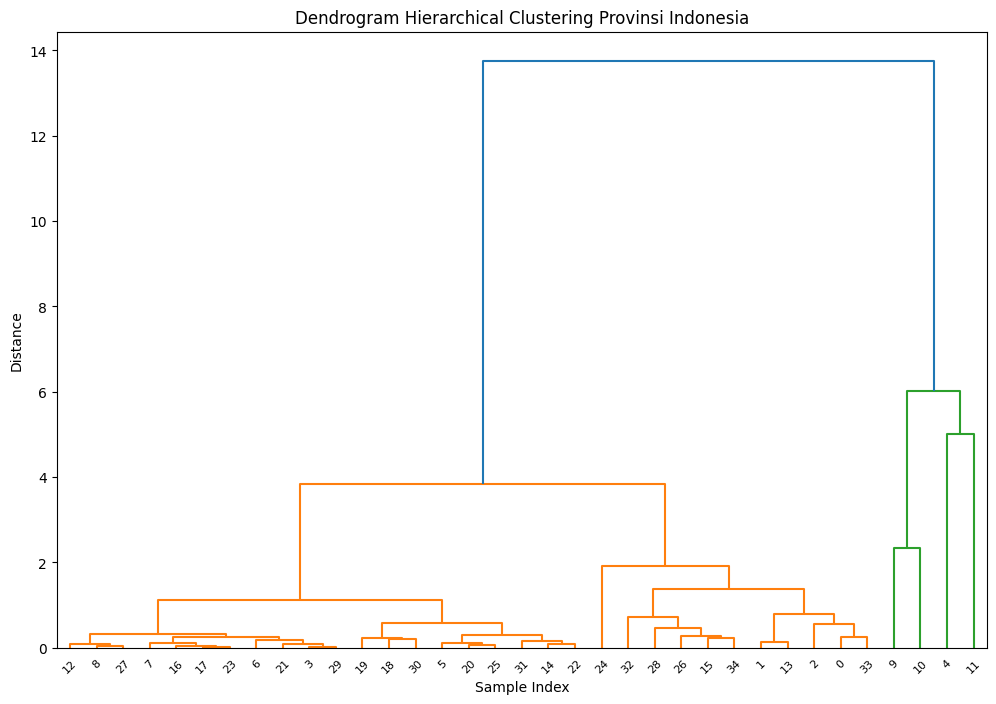

In [14]:
# Membuat dendrogram
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram Hierarchical Clustering Provinsi Indonesia')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [16]:
# Melakukan clustering (dengan 4 cluster)
n_clusters = 4
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(X_scaled)

In [17]:
# Menambahkan hasil clustering ke dataframe
latest_data['Cluster'] = clusters

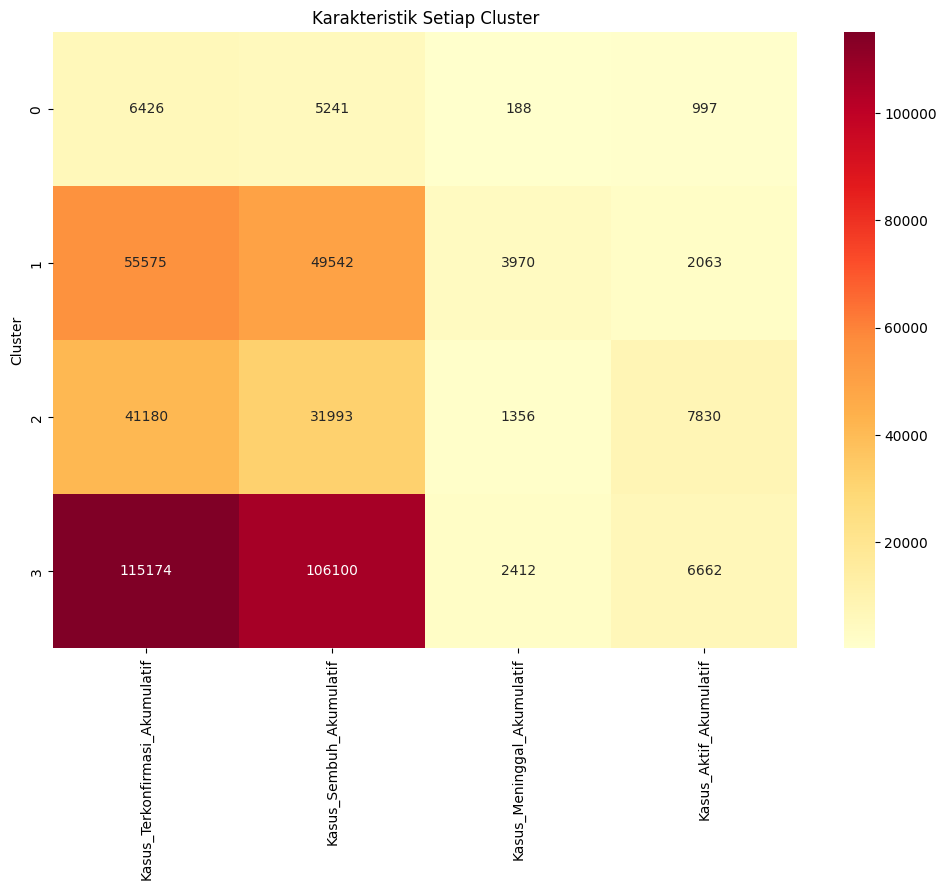

In [18]:
# Membuat heatmap untuk melihat karakteristik setiap cluster
plt.figure(figsize=(12, 8))
cluster_means = latest_data.groupby('Cluster')[features].mean()
sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.0f')
plt.title('Karakteristik Setiap Cluster')
plt.show()

In [19]:
# Print hasil clustering
print("\nHasil Clustering per Provinsi:")
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    provinces = latest_data[latest_data['Cluster'] == cluster]['Provinsi'].tolist()
    for province in provinces:
        print(f"- {province}")


Hasil Clustering per Provinsi:

Cluster 0:
- Aceh
- Bali
- Banten
- Bengkulu
- Daerah Istimewa Yogyakarta
- Gorontalo
- Indonesia
- Jambi
- Kalimantan Barat
- Kalimantan Selatan
- Kalimantan Tengah
- Kalimantan Timur
- Kalimantan Utara
- Kepulauan Bangka Belitung
- Kepulauan Riau
- Lampung
- Maluku
- Maluku Utara
- Nusa Tenggara Barat
- Nusa Tenggara Timur
- Papua
- Papua Barat
- Riau
- Sulawesi Barat
- Sulawesi Selatan
- Sulawesi Tengah
- Sulawesi Tenggara
- Sulawesi Utara
- Sumatera Barat
- Sumatera Selatan
- Sumatera Utara

Cluster 1:
- Jawa Timur

Cluster 2:
- Jawa Barat
- Jawa Tengah

Cluster 3:
- DKI Jakarta
